In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
393,7.3,0.24,0.43,2.0,0.021,20.0,69.0,0.99000,3.08,0.56,12.2,6
3517,6.6,0.29,0.29,1.8,0.036,38.0,102.0,0.98819,3.08,0.42,13.7,7
2162,9.9,0.49,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.4,6
3975,6.1,0.24,0.26,1.7,0.033,61.0,134.0,0.99030,3.19,0.81,11.9,7
328,6.5,0.28,0.35,15.4,0.042,55.0,195.0,0.99780,3.23,0.50,9.6,6


### Feature identication says "quality" is our target variable and rest are our predictors

In [13]:
# Check if any of the following is NULL
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


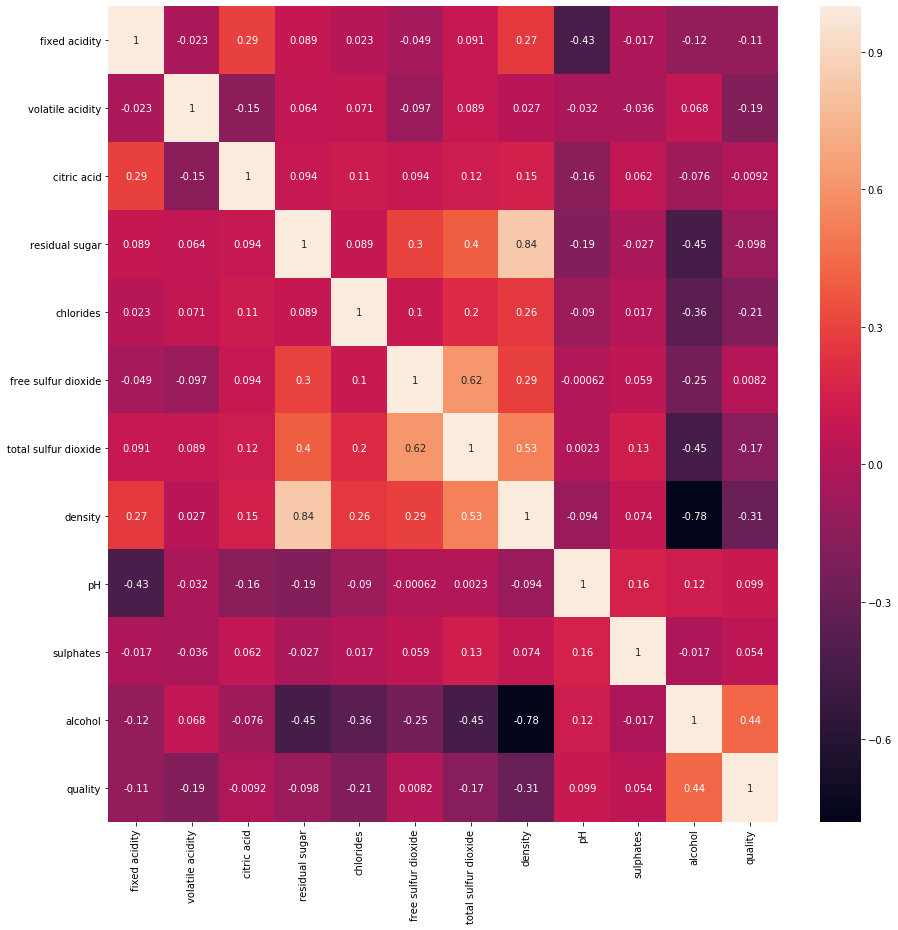

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), color='b', annot=True)

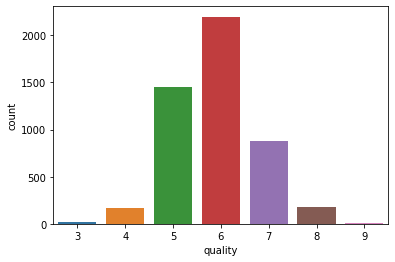

In [7]:
sns.countplot(x='quality', data = df)

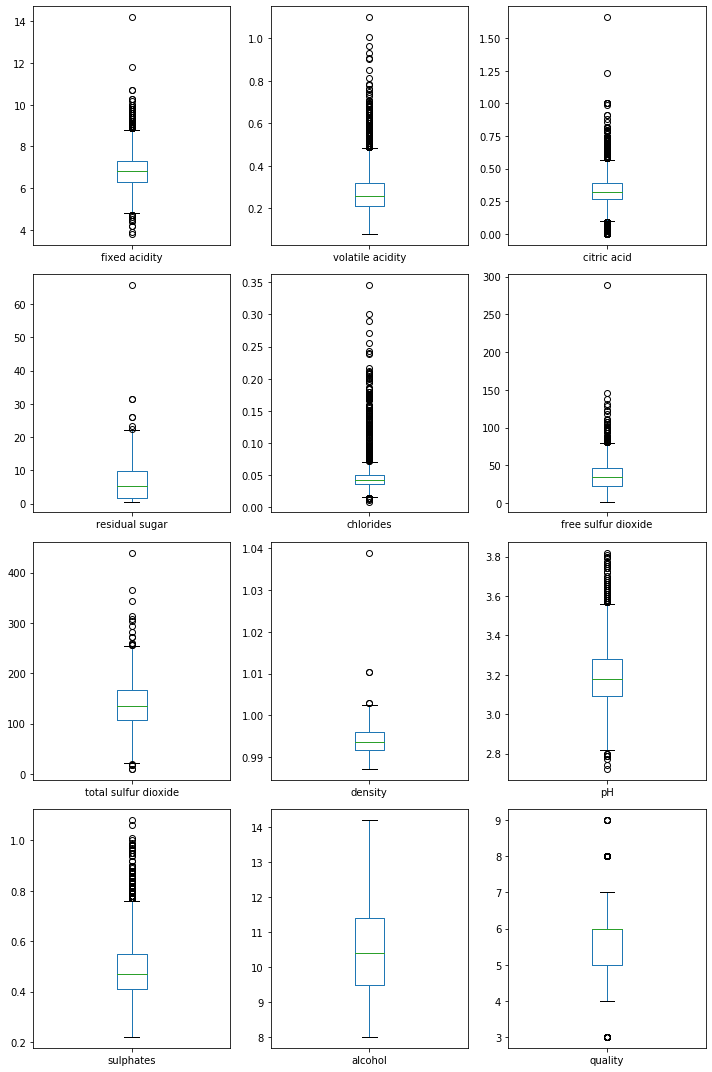

In [8]:
plt.figure(figsize=(10,15))

for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

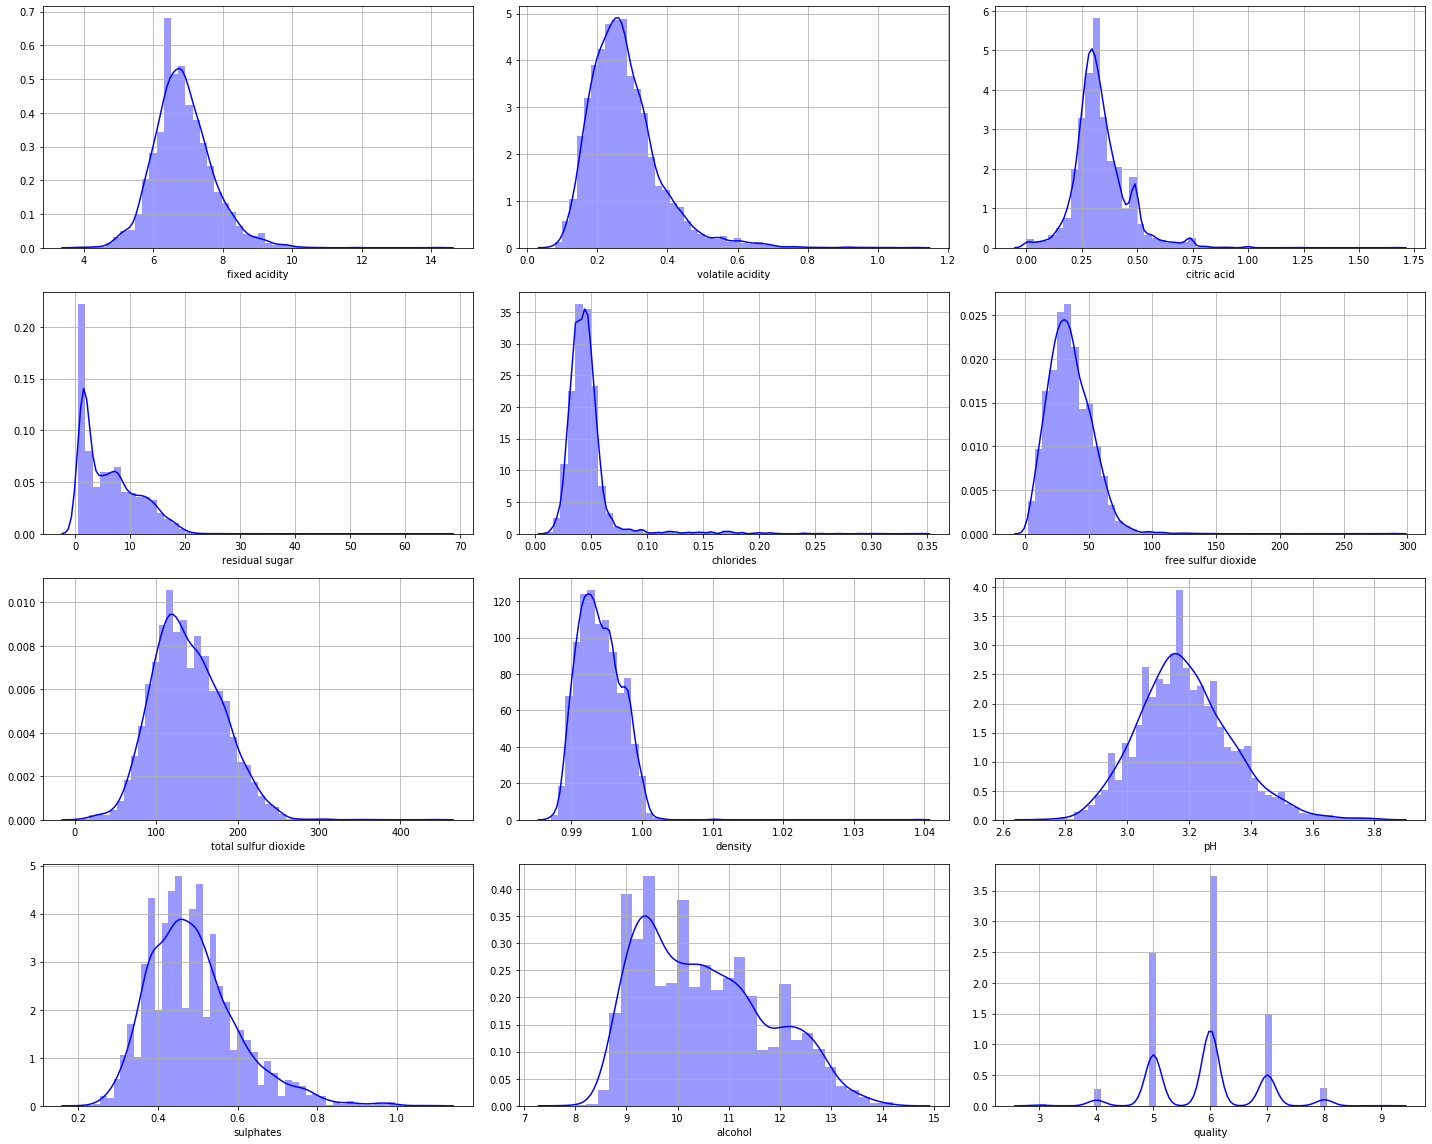

In [10]:
plt.figure(figsize=(20,16))

for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout() 


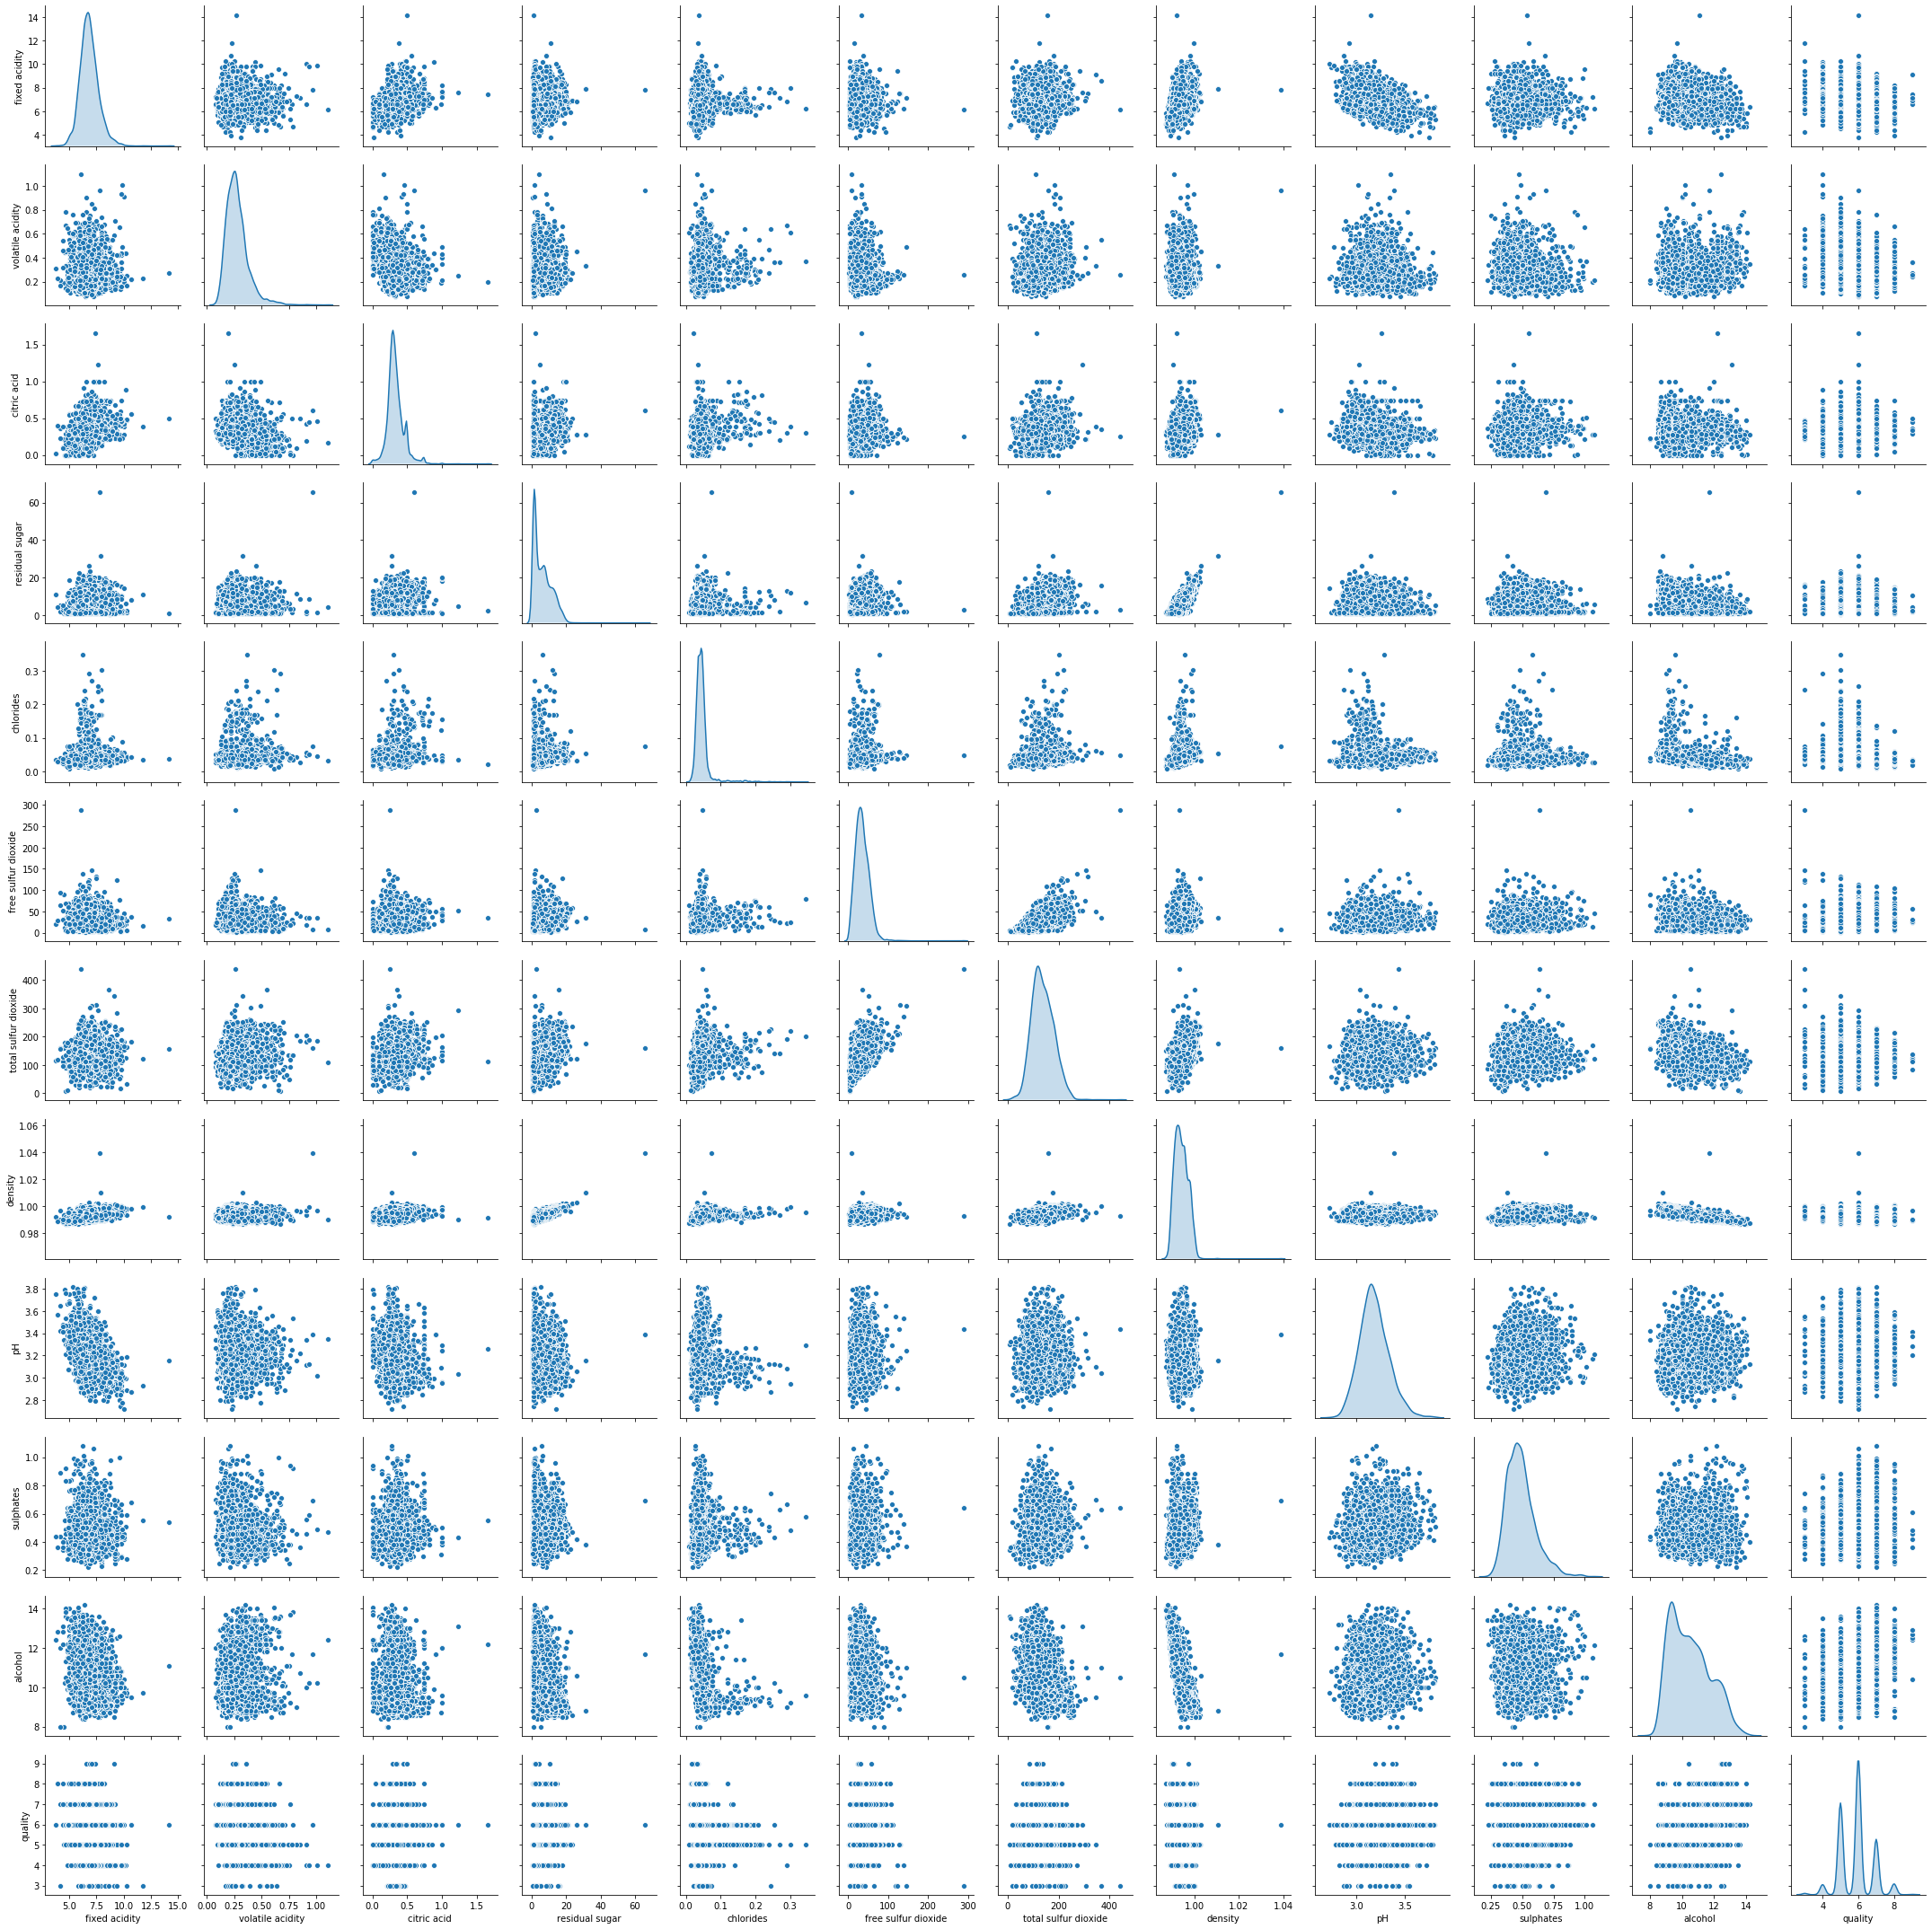

In [11]:
sns.pairplot(data=df, kind='scatter',diag_kind='kde')

# Relations

Strong relations :

    1) free sulfur dioxide ~ total sulfur dioxide
    2) alcohol ~ density

Moderate relations :

    3) total sulfur dioxide ~ residual sugar
    4) density ~ residual sugar